<a href="https://mybinder.org/v2/gh/homalg-project/InternalModules/master?filepath=examples/julia/notebooks/SymmetricAlgebraInternalToS4rep.ipynb" target="_top"><img src="https://img.shields.io/badge/launch%20interactively-binder-579ACA.svg?logo=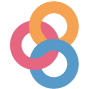" alt="binder"></a>



This is an example for explicit computations in the symmetric algebra $\mathrm{S}W$ internal to the positively graded closure $\mathrm{srep}_k(G)_+$ of the tensor category $\mathrm{srep}_k(G)$, where $G := S_4$ is the symmetric group on four points and $k = \mathbb{Q}$, its minimal splitting field.
The natural permutation character on four points is the sum of the irreducible characters $1+\nu$, where $1$ denotes the trivial character.
Denote the irreducible degree $2$ character by $\rho$, the sign-character by $\sigma$, and set $\chi := \sigma \nu$.
The character table of $S_4$
$$
\begin{array}{c|rrrrr}
  & (1) & (12) & (12)(34) & (123) & (1234) \\
  \hline
  1 & 1 & 1 & 1 & 1 & 1 \\
  \sigma & 1 & -1 & 1 & 1 & -1 \\
  \rho & 2 & \cdot & 2 & -1 & \cdot \\
  \nu & 3 & 1 & -1 & \cdot & -1 \\
  \chi & 3 & -1 & -1 & \cdot & 1
\end{array}
$$

with componentwise addition and multiplication determines the structure of $\mathrm{srep}_k(S_4)$ as a skeletal semisimple $\mathbb{Q}$-linear Abelian category with bifunctor $\otimes$.


In [1]:
using HomalgProject

HomalgProject v0.4.14-dev
Imported OSCAR's component GAP
Type: ?HomalgProject for more information


In [2]:
LoadPackage( "InternalModules" )

In [3]:
srepG = RepresentationCategory( SymmetricGroup( 4 ) )

GAP: The representation category of SymmetricGroup( [ 1 .. 4 ] )

In [4]:
G = UnderlyingGroupForRepresentationCategory( srepG )

GAP: Sym( [ 1 .. 4 ] )

In [5]:
irr = Irr( G );

In [6]:
𝟙 = RepresentationCategoryObject( irr[5], srepG, "𝟙" )

GAP: 1*(x_𝟙)

In [7]:
σ = RepresentationCategoryObject( irr[1], srepG, "σ" )

GAP: 1*(x_σ)

In [8]:
ρ = RepresentationCategoryObject( irr[3], srepG, "ρ" )

GAP: 1*(x_ρ)

In [9]:
ν = RepresentationCategoryObject( irr[4], srepG, "ν" )

GAP: 1*(x_ν)

In [10]:
χ = RepresentationCategoryObject( irr[2], srepG, "χ" )

GAP: 1*(x_χ)

In [11]:
TensorProduct( ρ, σ, ρ )

GAP: 1*(x_σ) + 1*(x_ρ) + 1*(x_𝟙)

In [12]:
TensorProduct( ρ, ρ )

GAP: 1*(x_σ) + 1*(x_ρ) + 1*(x_𝟙)

---
Using the package [$\mathtt{GroupRepresentationsForCAP}$](https://github.com/homalg-project/CAP_project/tree/master/GroupRepresentationsForCAP) we now turn $\mathrm{srep}_k(S_4)$ into a skeletal semisimple $\mathbb{Q}$-linear Abelian tensor category.
However, regardless of which choices we make, the associator and braiding cannot be given by identities.
Using the package, we compute

$$
  \alpha_{\rho,\sigma,\rho}: \rho \otimes (\sigma \otimes \rho) = 1 \oplus \sigma \oplus \rho \xrightarrow{\operatorname{diag}(-1,-1,1)} 1 \oplus \sigma \oplus \rho = (\rho \otimes \sigma) \otimes \rho
$$
and
$$
  \gamma_{\rho,\rho}: \rho \otimes \rho = 1 \oplus \sigma \oplus \rho \xrightarrow{\operatorname{diag}(1,-1,1)} 1 \oplus \sigma \oplus \rho = \rho \otimes \rho \mbox{.}
$$


In [13]:
AssociatorRightToLeft( ρ, σ, ρ )

GAP: <A morphism in The representation category of SymmetricGroup( [ 1 .. 4 ] )>

In [14]:
Braiding( ρ, ρ )

GAP: <A morphism in The representation category of SymmetricGroup( [ 1 .. 4 ] )>

---
Using the package [$\mathtt{GradedCategories}$](https://github.com/homalg-project/GradedCategories) we now construct the positively graded closure $\mathrm{srep}_k(S_4)_+$ of $\mathrm{srep}_k(S_4)$.

Taking $W = \chi \equiv \chi^{\{1\}} \in \mathrm{srep}_k(S_4)_+$, the objects in $\mathrm{S}^i W$ can be computed using the character table of $S_4$ augmented with the power maps:

\begin{align*}
  \mathrm{S}W &= \underbrace{1^{\{0\}}}_{\mathrm{S}^0 W} \oplus \underbrace{\chi^{\{1\}}}_{\mathrm{S}^1 W} \oplus \underbrace{\left( 1^{\{2\}} \oplus \rho^{\{2\}} \oplus \nu^{\{2\}} \right)}_{\mathrm{S}^2 W} \oplus \underbrace{\left( \sigma^{\{3\}} \oplus \nu^{\{3\}} \oplus 2 \cdot \chi^{\{3\}} \right)}_{\mathrm{S}^3 W} \\
  & \oplus \underbrace{\left( 2 \cdot 1^{\{4\}} \oplus 2 \cdot \rho^{\{4\}} \oplus 2 \cdot \nu^{\{4\}} \oplus \chi^{\{4\}} \right)}_{\mathrm{S}^4 W} \oplus \cdots
\end{align*}



In [15]:
W = χ

GAP: 1*(x_χ)

In [16]:
LoadPackage( "GradedCategories" )

In [17]:
ZsrepG = PositivelyZGradedCategory( srepG )

GAP: The positively graded category of The representation category of SymmetricGroup( [ 1 .. 4 ] )

In [18]:
LoadPackage( "InternalModules" )

In [19]:
SWMod = CategoryOfLeftSModules( W )

GAP: Abelian category of left modules over the internal symmetric algebra of 1*(x_χ) with undecidable (mathematical) equality of morphisms and uncomputable lifts and colifts

In [20]:
SW = UnderlyingActingObject( SWMod )

GAP: <An object in The positively graded category of The representation category of SymmetricGroup( [ 1 .. 4 ] )>

In [21]:
SW[0]

GAP: 1*(x_𝟙)

In [22]:
SW[1]

GAP: 1*(x_χ)

In [23]:
SW[2]

GAP: 1*(x_ρ) + 1*(x_ν) + 1*(x_𝟙)

In [24]:
SW[3]

GAP: 1*(x_σ) + 2*(x_χ) + 1*(x_ν)

In [25]:
SW[4]

GAP: 1*(x_χ) + 2*(x_ρ) + 2*(x_ν) + 2*(x_𝟙)

---
However, computing the multiplications $\mu^{i,j}: \mathrm{S}^i W \otimes \mathrm{S}^j W \to \mathrm{S}^{i+j} W$ goes beyond the augmented character table and needs the associator and braiding of $\mathrm{srep}_k(S_4)_+$.
For computing them we currently still need an explicit irreducible representation affording each irreducible character.
Computing products of elements in $(\mathrm{S}W)^\in$ with [$\mathtt{InternalModules}$](https://github.com/homalg-project/InternalModules) utilizing [$\mathtt{GroupRepresentationsForCAP}$](https://github.com/homalg-project/CAP_project/tree/master/GroupRepresentationsForCAP) we get in primitive decomposition

\begin{align*}
  (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}}
  &=
  (1) 1^{\{2\}} + (1) \rho^{\{2\}} + (1) \nu^{\{2\}},
  \\
  \hline
  (1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right)
  &=
  (1) \sigma^{\{3\}} + (3) \nu^{\{3\}} + (5,3) \chi^{\{3\}}
  =
  \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot (1)\chi^{\{1\}},
  \\
  (1)\chi^{\{1\}} \cdot (1)\rho^{\{2\}}
  &=
  (0) \sigma^{\{3\}} + (1) \nu^{\{3\}} + (0,2) \chi^{\{3\}}
  =
  (1)\rho^{\{2\}} \cdot (1)\chi^{\{1\}},
  \\
  (1)\chi^{\{1\}} \cdot (1)\nu^{\{2\}}
  &=
  (1) \sigma^{\{3\}} + (2) \nu^{\{3\}} + (8,0) \chi^{\{3\}}
  =
  (1)\nu^{\{2\}} \cdot (1)\chi^{\{1\}},
  \\
  \hline
  (1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \right)
  &=
  (5,3) \cdot 1^{\{4\}} + (3,-31) \rho^{\{4\}} + (5,6) \nu^{\{4\}} + (-2) \chi^{\{4\}},
  \\
  \left( \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot (1)\chi^{\{1\}} \right) \cdot (1)\chi^{\{1\}}
  &=
  (5,3) \cdot 1^{\{4\}} + (3,-31) \rho^{\{4\}} + (5,6) \nu^{\{4\}} + (26) \chi^{\{4\}},
  \\
  \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot \left( (1)\chi^{\{1\}}  \cdot (1)\chi^{\{1\}} \right)
  &=
  \left(-7,\frac{9}{8}\right) \cdot 1^{\{4\}} + \left(\frac{9}{4},\frac{43}{4}\right) \rho^{\{4\}} + (-16,-6) \nu^{\{4\}} + (8) \chi^{\{4\}},
  \\
  \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot (1)\rho^{\{2\}}
  &=
  \left(0,\frac{1}{8}\right) \cdot 1^{\{4\}} + \left(\frac{5}{4},\frac{-9}{4}\right) \rho^{\{4\}} + (-4,-4) \nu^{\{4\}} + (4) \chi^{\{4\}},
  \\
  (1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot (1)\rho^{\{2\}} \right)
  &=
  (0,2) \cdot 1^{\{4\}} + (2,-12) \rho^{\{4\}} + (-1,-1) \nu^{\{4\}} + (-2) \chi^{\{4\}},
  \\
  \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot (1)\nu^{\{2\}}
  &=
  (-4,0) \cdot 1^{\{4\}} + (0,16) \rho^{\{4\}} + (-8,-1) \nu^{\{4\}} + (4) \chi^{\{4\}},
  \\
  (1)\chi^{\{1\}} \cdot (1)\nu^{\{3\}}
  &=
  (0,0) \cdot 1^{\{4\}} + (0,-12) \rho^{\{4\}} + (1,1) \nu^{\{4\}} + (4) \chi^{\{4\}}
  =
  (1)\nu^{\{3\}} \cdot (1)\chi^{\{1\}}
  \mbox{.}
\end{align*}

We see from the above computations that

$$
	(1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \right)
	\neq
	\left( \left( (1)\chi^{\{1\}} \cdot (1)\chi^{\{1\}} \right) \cdot (1)\chi^{\{1\}} \right) \cdot (1)\chi^{\{1\}} \mbox{,}
$$

so, as expected, the product is neither associative nor commutative as each of the two properties would imply equality.


In [26]:
χ¹ = InternalElement( SW, χ, 1, 1 )

GAP: degree: 1

Component: (x_χ)

1

A morphism in Category of matrices over Q

------------------------


In [27]:
ρ² = InternalElement( SW, ρ, 2, 1 )

GAP: degree: 2

Component: (x_ρ)

1

A morphism in Category of matrices over Q

------------------------


In [28]:
ν² = InternalElement( SW, ν, 2, 1 )

GAP: degree: 2

Component: (x_ν)

1

A morphism in Category of matrices over Q

------------------------


In [29]:
ν³ = InternalElement( SW, ν, 3, 1 )

GAP: degree: 3

Component: (x_ν)

1

A morphism in Category of matrices over Q

------------------------


In [30]:
χ¹ * χ¹

GAP: degree: 2

Component: (x_ρ)

1

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

1

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

1

A morphism in Category of matrices over Q

------------------------


In [31]:
χ¹ * (χ¹ * χ¹)

GAP: degree: 3

Component: (x_σ)

1

A morphism in Category of matrices over Q

------------------------
Component: (x_χ)

5,3

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

3

A morphism in Category of matrices over Q

------------------------


In [32]:
χ¹ * (χ¹ * χ¹) == (χ¹ * χ¹) * χ¹

true

In [33]:
χ¹ * ρ²

GAP: degree: 3

Component: (x_χ)

0,2

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

1

A morphism in Category of matrices over Q

------------------------


In [34]:
χ¹ * ρ² == ρ² * χ¹

true

In [35]:
χ¹ * ν²

GAP: degree: 3

Component: (x_σ)

1

A morphism in Category of matrices over Q

------------------------
Component: (x_χ)

8,0

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

2

A morphism in Category of matrices over Q

------------------------


In [36]:
χ¹ * ν² == ν² * χ¹

true

In [37]:
χ¹ * (χ¹ * (χ¹ * χ¹))

GAP: degree: 4

Component: (x_χ)

-2

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

3,-31

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

5,6

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

5,3

A morphism in Category of matrices over Q

------------------------


In [38]:
(χ¹ * χ¹) * (χ¹ * χ¹)

GAP: degree: 4

Component: (x_χ)

8

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

9/4,43/4

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

-16,-6

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

-7,9/8

A morphism in Category of matrices over Q

------------------------


In [39]:
((χ¹ * χ¹) * χ¹) * χ¹

GAP: degree: 4

Component: (x_χ)

26

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

3,-31

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

5,6

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

5,3

A morphism in Category of matrices over Q

------------------------


In [40]:
(χ¹ * χ¹) * ρ²

GAP: degree: 4

Component: (x_χ)

4

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

5/4,-9/4

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

-4,-4

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

0,1/8

A morphism in Category of matrices over Q

------------------------


In [41]:
χ¹ * (χ¹ * ρ²)

GAP: degree: 4

Component: (x_χ)

-2

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

2,-12

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

-1,-1

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

0,2

A morphism in Category of matrices over Q

------------------------


In [42]:
(χ¹ * χ¹) * ν²

GAP: degree: 4

Component: (x_χ)

4

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

0,16

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

-8,-1

A morphism in Category of matrices over Q

------------------------
Component: (x_𝟙)

-4,0

A morphism in Category of matrices over Q

------------------------


In [43]:
χ¹ * ν³

GAP: degree: 4

Component: (x_χ)

4

A morphism in Category of matrices over Q

------------------------
Component: (x_ρ)

0,-12

A morphism in Category of matrices over Q

------------------------
Component: (x_ν)

1,1

A morphism in Category of matrices over Q

------------------------


In [44]:
χ¹ * ν³ == ν³ * χ¹

true

We see from the above computations that

In [45]:
χ¹ * (χ¹ * (χ¹ * χ¹)) != ((χ¹ * χ¹) * χ¹) * χ¹

true

so, as expected, the product is neither associative nor commutative as each of the two properties would imply equality.
